In [2]:
%matplotlib inline
from GroupLevel.Analyses import group_oscillation_cluster
from SubjectLevel.Analyses import subject_oscillation_cluster, subject_classifier, subject_classifier_peaks
import matplotlib.pyplot as plt
import numpy as np
# from scipy.signal import hilbert
import ram_data_helpers
# import nibabel as nib
from SubjectLevel import subject_exclusions


/Users/jmiller/anaconda2/envs/PTSA/lib/python2.7/site-packages/matplotlib/style/core.py:197: UserWarning: In /Users/jmiller/.matplotlib/stylelib/myplotstyle.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)
/Users/jmiller/anaconda2/envs/PTSA/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Could not import MorletWaveletFilterCppLegacy (single-core C++ version of MorletWaveletFilter): cannot import name MorletWaveletTransform
You can still use MorletWaveletFilter


In [3]:
%gui qt

In [3]:
subjs = ram_data_helpers.get_subjs_and_montages('RAM_FR1')

In [17]:
basedir='/Users/jmiller/data/python'
for subj_info in subjs:
    subj = subject_oscillation_cluster.SubjectElecCluster(task='RAM_FR1', 
                                                          subject=subj_info[0], 
                                                          montage=subj_info[1])
    subj.base_dir = basedir
    subj.near_dist = 15.
    subj.load_res_data()
    subj.add_loc_info()
    
    if (subj.res) and (subj.res['clusters']):
        subj.plot_cluster_on_brain(save_dir='/Users/jmiller/Desktop/waves')

R1001P: loading results.
R1002P: loading results.
R1003P: loading results.
R1006P: loading results.
R1010J: loading results.
R1015J: No results to load.
R1018P: loading results.
R1020J: loading results.
R1022J: loading results.
R1023J: loading results.
R1026D: loading results.
R1027J: loading results.
R1030J: loading results.
R1031M: loading results.
R1032D: loading results.
R1033D: No results to load.
R1034D: loading results.
R1035M: No results to load.
R1036M: loading results.
R1039M: loading results.
R1042M: loading results.
R1044J: No results to load.
R1045E: loading results.
R1048E: loading results.
R1049J: loading results.
R1050M: loading results.
R1051J: loading results.
R1052E: loading results.
R1052E: loading results.
R1053M: No results to load.
R1054J: loading results.
R1056M: loading results.
R1057E: loading results.
R1059J: loading results.
R1059J: loading results.
R1060M: loading results.
R1061T: loading results.
R1062J: loading results.
R1063C: loading results.
R1063C: lo

KeyboardInterrupt: 

In [33]:
fig = mlab.gcf()

In [4]:
from surfer import Brain
from mayavi import mlab
import matplotlib.cm as cmx
import matplotlib.colors as clrs
from sklearn.decomposition import PCA
import pycircstat
from tvtk.tools import visual

In [43]:
clusters['ref_phase'][i][:10,277]

array([ 5.75868795,  3.3755134 ,  5.69336356,  3.59136606,  0.10482355,
        5.6770162 ,  3.31355771,  4.00660231,  3.24871896,  3.28875126])

In [50]:
rel_phase=pycircstat.mean(clusters['phase_ts'][i], axis=1).T + pycircstat.mean(clusters['ref_phase'][i], axis=0)
rel_phase[:,277]

array([ 0.39038242,  6.56546603,  0.39956914,  0.826899  ,  0.61440823,
        0.4535677 ,  0.40184379,  0.39182795,  0.29166726,  6.43030142,
        6.38784526,  6.32936548,  6.33568033,  6.35709615])

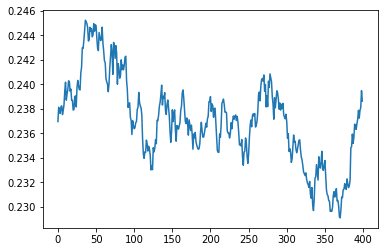

In [119]:
plt.plot(np.mean(clusters['cluster_wave_freq'][3],axis=1))

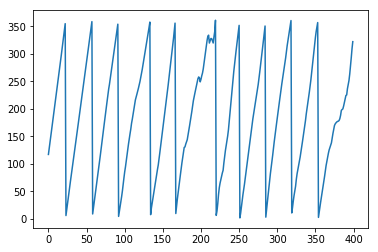

In [120]:
# rel_phase = pycircstat.mean(clusters['phase_ts'][i][timepoint], axis=0)
# rel_phase = (rel_phase + np.pi) % (2*np.pi) - np.pi
# rel_phase *= 180./np.pi
# rel_phase -= rel_phase.min() - 1
# print rel_phase
i=3
timepoint=277
clusters = subj.res['clusters'][8.0]
# print(clusters['ref_phase'][i].shape)
rel_phase = clusters['phase_ts'][i].T + clusters['ref_phase'][i]
rel_phase = pycircstat.mean(rel_phase, axis=1)
# rel_phase = rel_phase.T[timepoint]

# rel_phase=pycircstat.mean(clusters['phase_ts'][i], axis=1).T + pycircstat.mean(clusters['ref_phase'][i], axis=0)
rel_phase = (rel_phase + np.pi) % (2*np.pi) - np.pi
rel_phase *= 180./np.pi
rel_phase -= rel_phase.min() - 1
plt.plot(rel_phase[0])

In [129]:
def plot_cluster_on_brain(self, timepoint=None, save_dir=None):

    # get electode locations
    x, y, z = np.stack(self.elec_xyz_avg).T

    # loop over each cluster
    count = 0
#     for clus_freq in self.res['clusters'].keys():
    for clus_freq in [8.0]:        
        clusters = self.res['clusters'][clus_freq]
        for i, cluster_elecs in enumerate([clusters['elecs'][3]]):
#             print cluster_elecs
            i = 3
            count += 1
            # sorry
            try:
                mlab.close()
            except:
                pass

            # render brain
            brain = Brain('average', 'both', 'pial', views='lateral', cortex='low_contrast', background='white',
                          offscreen=False, show_toolbar=True)

            # change opacity
            brain.brain_matrix[0][0]._geo_surf.actor.property.opacity = .3
            brain.brain_matrix[0][1]._geo_surf.actor.property.opacity = .3

            # get phases to plot
            if timepoint is None:
                timepoint = np.argmax(np.nanmean(clusters['cluster_r2_adj'][i], axis=1))
#             print(np.max(np.nanmean(clusters['cluster_r2_adj'][i], axis=1)))

#             rel_phase = pycircstat.mean(clusters['phase_ts'][i][timepoint], axis=0)
#             rel_phase = (rel_phase + np.pi) % (2*np.pi) - np.pi
#             rel_phase *= 180./np.pi
#             rel_phase -= rel_phase.min() - 1
#             print rel_phase
            
            rel_phase = clusters['phase_ts'][i].T + clusters['ref_phase'][i]
            rel_phase = pycircstat.mean(rel_phase, axis=1)
#             rel_phase=pycircstat.mean(clusters['phase_ts'][i], axis=1).T + pycircstat.mean(clusters['ref_phase'][i], axis=0)
#             rel_phase = clusters['phase_ts'][i].T + clusters['ref_phase'][i]
#             rel_phase = pycircstat.mean(rel_phase, axis=1)
            

            rel_phase = (rel_phase + np.pi) % (2*np.pi) - np.pi
            rel_phase *= 180./np.pi
            rel_phase += 180.
#             rel_phase -= rel_phase.min() - 1
#             print rel_phase[0]
            rel_phase = rel_phase.T[timepoint]

            cm = plt.get_cmap('viridis')
            cNorm = clrs.Normalize(vmin=1, vmax=np.max(rel_phase))
            scalarmap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
            colors = scalarmap.to_rgba(np.squeeze(rel_phase)) * 255
#             print(colors)
            # create array of colors, including black for the number cluster electrodes
            in_cluster_elecs = cluster_elecs
            all_elec_colors = np.array([[0, 0, 0, 255]] * x.shape[0])
            all_elec_colors[in_cluster_elecs] = colors
            scalars = np.arange(all_elec_colors[in_cluster_elecs].shape[0])

            brain.pts = mlab.points3d(x[in_cluster_elecs], y[in_cluster_elecs], z[in_cluster_elecs], rel_phase, scale_factor=(10. * .4), opacity=1,
                                      scale_mode='none', name='phase_elecs')
            brain.pts.glyph.color_mode = 'color_by_scalar'
            brain.pts.module_manager.scalar_lut_manager.lut_mode = 'jet'
            
            not_cluster_elecs = np.setdiff1d(np.arange(len(x)),cluster_elecs)
            mlab.points3d(x[not_cluster_elecs], y[not_cluster_elecs], z[not_cluster_elecs], scale_factor=(10. * .4), opacity=1,
                                      scale_mode='none', name='not_phase_elecs', color=(0,0,0))
            
            colorbar = mlab.colorbar(brain.pts, title='phase', orientation='horizontal', label_fmt = '%.1f')
            colorbar.scalar_bar_representation.position = [0.1, 0.9]
            colorbar.scalar_bar_representation.position2 = [0.8, 0.1]
            brain.pts.module_manager.scalar_lut_manager.label_text_property.bold = True
            brain.pts.module_manager.scalar_lut_manager.label_text_property.color = (.4,.4,.4)
            brain.pts.module_manager.scalar_lut_manager.label_text_property.font_size = 10
            brain.pts.module_manager.scalar_lut_manager.label_text_property.italic = False
#             brain.pts.module_manager.scalar_lut_manager.data_range = [0, np.pi * 2.]
            brain.pts.module_manager.scalar_lut_manager.data_range = [0, 360]            
            
            xyz = np.stack([x,y,z]).T[cluster_elecs]
            xyz -= np.mean(xyz, axis=0)
            pca = PCA(n_components=3)
            pca.fit_transform(xyz)
            mean_ang = pycircstat.mean(clusters['cluster_wave_ang'][i][timepoint])
            ad = np.cos(mean_ang) * pca.components_[:, 0] + np.sin(mean_ang) * pca.components_[:, 1]
            ad = 10 * ad / np.linalg.norm(ad)

            start = np.stack(self.elec_xyz_avg[cluster_elecs], 0).mean(axis=0) - ad
            stop = np.stack(self.elec_xyz_avg[cluster_elecs], 0).mean(axis=0) + ad

            visual.set_viewer(mlab.gcf())
            ar1 = visual.arrow(x=start[0], y=start[1], z=start[2])
            ar1.length_cone = 0.4
            arrow_length = np.linalg.norm(stop-start)
            ar1.actor.scale = [arrow_length, arrow_length, arrow_length]
            ar1.pos = ar1.pos/arrow_length
            ar1.axis = stop-start
            ar1.color = (1., 0, 0)

            # some tweaks to the lighting
            mlab.gcf().scene.light_manager.light_mode = 'vtk'
            mlab.gcf().scene.light_manager.lights[0].activate = True
            mlab.gcf().scene.light_manager.lights[1].activate = True

            if save_dir is not None:
                r2 = np.nanmean(clusters['mean_cluster_r2_adj'][i])
                freq = clusters['mean_freqs'][i]
                n_elecs = len(cluster_elecs)

#                 # left
#                 mlab.view(azimuth=180, distance=500)
#                 brain.save_image(
#                     os.path.join(save_dir,
#                                  '%s_freq_%.3f_%d_elecs_r2_%.2f_left_t_%.3d.png' % (self.subj, freq, n_elecs, r2, timepoint)))

#                 # right
#                 mlab.view(azimuth=0, distance=500)
#                 brain.save_image(
#                     os.path.join(save_dir,
#                                  '%s_freq_%.3f_%d_elecs_r2_%.2f_right_t_%.3d.png' % (self.subj, freq, n_elecs, r2, timepoint)))

#                 # inf
#                 mlab.view(azimuth=0, elevation=180, distance=500)
#                 brain.save_image(
#                     os.path.join(save_dir,
#                                  '%s_freq_%.3f_%d_elecs_r2_%.2f_inf_t_%.3d.png' % (self.subj, freq, n_elecs, r2, timepoint)))

                # sup
                mlab.view(azimuth=0, elevation=0, distance=500)
                brain.save_image(
                    os.path.join(save_dir,
                                 '%s_freq_%.3f_%d_elecs_r2_%.2f_sup_t_%.3d.png' % (self.subj, freq, n_elecs, r2, timepoint)))
    return brain

In [112]:
'%.3d' % 1

'001'

In [124]:
brain = plot_cluster_on_brain(subj,0)

[116, 115, 117, 109, 108, 107, 106, 105, 114, 113, 112, 111, 110, 104]


In [130]:
import os
for t in range(400):
    brain = plot_cluster_on_brain(subj,t, save_dir='/Users/jmiller/Desktop/R1108J_v2')

In [22]:
subj.plot_cluster_on_brain(save_dir='/Users/jmiller/Desktop')

> /Users/jmiller/python/RAM_ECoG/SubjectLevel/Analyses/subject_oscillation_cluster.py(360)plot_cluster_on_brain()
-> visual.set_viewer(mlab.gcf())
(Pdb) c
> /Users/jmiller/python/RAM_ECoG/SubjectLevel/Analyses/subject_oscillation_cluster.py(359)plot_cluster_on_brain()
-> # pdb.set_trace()
(Pdb) c
> /Users/jmiller/python/RAM_ECoG/SubjectLevel/Analyses/subject_oscillation_cluster.py(360)plot_cluster_on_brain()
-> visual.set_viewer(mlab.gcf())
(Pdb) c


In [ ]:
from mayavi import mlab 

In [ ]:
from mayavi import mlab
from tvtk.tools import visual

In [68]:
def plot_sme_on_brain(self, freq_ind):

    # get electode locations
    x, y, z = np.stack(self.elec_xyz_avg).T

    ts = subj.res['ts'][:, freq_ind]
    lim = np.max(np.abs(ts))
    # render brain
    brain = Brain('average', 'both', 'pial', views='lateral', cortex='low_contrast', background='white',
                  offscreen=False, show_toolbar=True)

    # change opacity
    brain.brain_matrix[0][0]._geo_surf.actor.property.opacity = .3
    brain.brain_matrix[0][1]._geo_surf.actor.property.opacity = .3

    brain.pts = mlab.points3d(x, y, z, ts,
                              scale_factor=(10. * .4), opacity=1,
                              scale_mode='none', name='phase_elecs')
    brain.pts.glyph.color_mode = 'color_by_scalar'
    brain.pts.module_manager.scalar_lut_manager.lut_mode = 'RdBu'

    colorbar = mlab.colorbar(brain.pts,  title='t-stat', orientation='horizontal', label_fmt='%.1f')
    colorbar.scalar_bar_representation.position = [0.1, 0.9]
    colorbar.scalar_bar_representation.position2 = [0.8, 0.1]
    brain.pts.module_manager.scalar_lut_manager.label_text_property.bold = True
    brain.pts.module_manager.scalar_lut_manager.label_text_property.color = (.4, .4, .4)
    brain.pts.module_manager.scalar_lut_manager.label_text_property.font_size = 10
    brain.pts.module_manager.scalar_lut_manager.label_text_property.italic = False
    
    brain.pts.module_manager.scalar_lut_manager.lut.table_range = [-lim,lim]
    lut = brain.pts.module_manager.scalar_lut_manager.lut.table.to_array()
    lut = lut[::-1]
    brain.pts.module_manager.scalar_lut_manager.lut.table = lut    

    # some tweaks to the lighting
    mlab.gcf().scene.light_manager.light_mode = 'vtk'
    mlab.gcf().scene.light_manager.lights[0].activate = True
    mlab.gcf().scene.light_manager.lights[1].activate = True
    return brain


In [5]:
subj = subject_oscillation_cluster.SubjectElecCluster(task='RAM_FR1', 
                                                      subject='R1108J', 
                                                      montage=1)
basedir='/Users/jmiller/data/python'
subj.base_dir = basedir
subj.near_dist = 15.
# subj.res_str = 'elec_cluster_3_cm.p'
subj.load_res_data()
subj.add_loc_info()
subj.load_data()
subj = subject_exclusions.remove_abridged_sessions(subj)

R1108J: loading results.
R1108J: Input data already exists, loading.
R1108J: Removing sessions 2 (1 of 4)


In [16]:
plot_cluster_on_brain(subj,300)

0.323578981959
0.415500843579
0.413605970985
0.481308633055


In [ ]:
import os
for t in range(400):
    plot_cluster_on_brain(subj, t, save_dir='/Users/jmiller/Desktop/R1108J')

In [94]:
np.argmax(np.nanmean(subj.res['clusters'][8.0]['cluster_r2_adj'][0], axis=1))

277

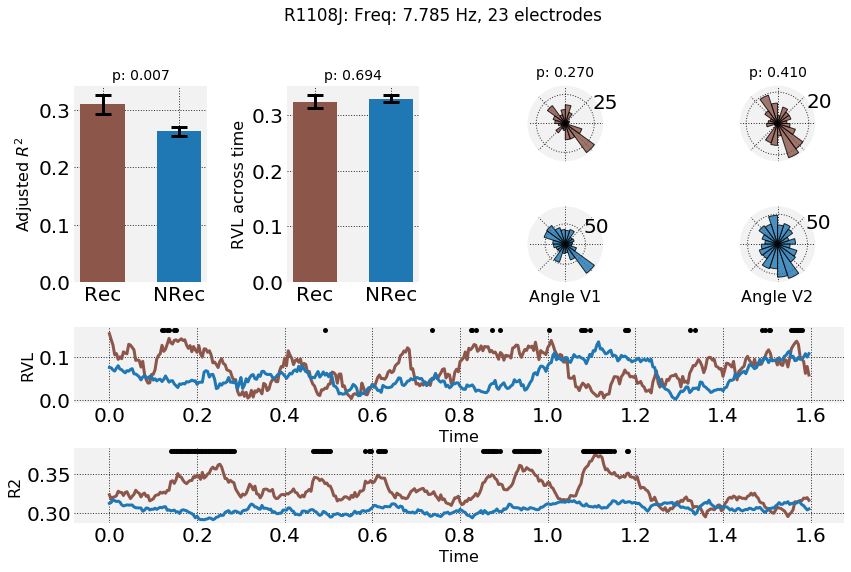

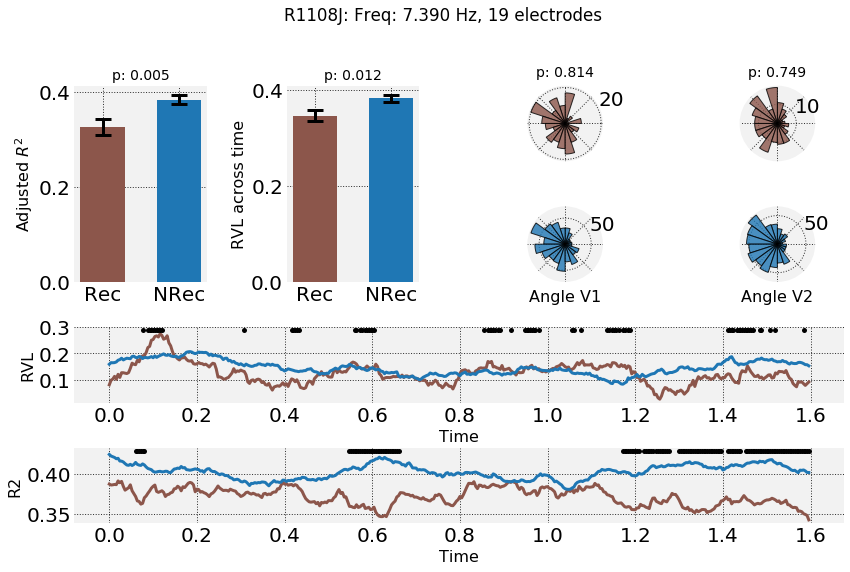

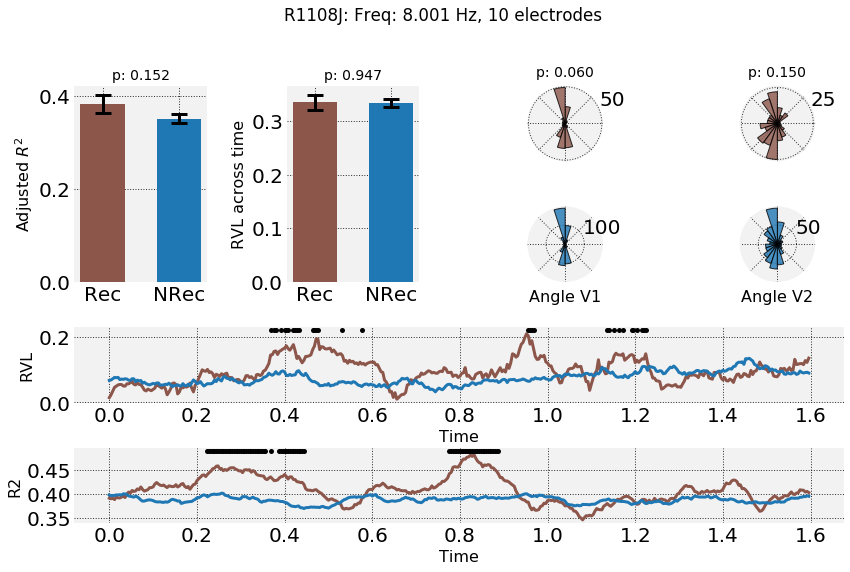

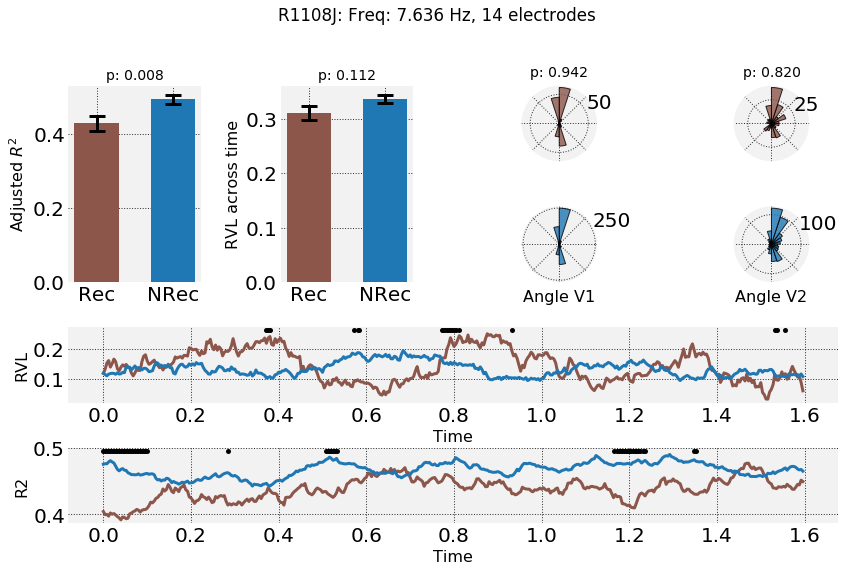

In [47]:
# %matplotlib inline
plot_cluster_features_by_rec(subj)

In [46]:
from scipy.stats import sem, ttest_ind
import pycircstat
# plt.style.use('/home1/jfm2/python/RAM_classify/myplotstyle.mplstyle')
plt.style.use('/Users/jmiller/python/RAM_classify/myplotstyle.mplstyle')
def plot_cluster_features_by_rec(self):
    plt.style.use('/Users/jmiller/python/RAM_classify/myplotstyle.mplstyle')
    edges = np.arange(0, 2*np.pi + .2, np.pi/10)
    angs = np.mean(np.stack([edges[1:], edges[:-1]]),axis=0)
    
    red = '#8c564b'
    blue = '#1f77b4'
    recalled = self.recall_filter_func(self.task, self.subject_data.events.data, self.rec_thresh)
    
    for k in self.res['clusters'].keys():
        for clust_num in range(len(self.res['clusters'][k]['elecs'])):
            
#             fig, (ax1,ax2,ax3) = plt.subplots(1,3)
            ax1 = plt.subplot2grid((4,4), (0,0), rowspan=2)
            ax2 = plt.subplot2grid((4,4), (0,1), rowspan=2)    
            ax3 = plt.subplot2grid((4,4), (0,2), polar=True)
            ax4 = plt.subplot2grid((4,4), (1,2), polar=True)      
            ax5 = plt.subplot2grid((4,4), (0,3), polar=True)
            ax6 = plt.subplot2grid((4,4), (1,3), polar=True)   
            ax7 = plt.subplot2grid((4,4), (2,0), colspan=4)    
            ax8 = plt.subplot2grid((4,4), (3,0), colspan=4)               
#             plt.gcf().subplots_adjust(wspace=0.9)
    
            plt.suptitle('%s: Freq: %.3f Hz, %d electrodes' % (self.subj, self.res['clusters'][k]['mean_freqs'][clust_num], len(self.res['clusters'][k]['elecs'][clust_num])),
                        y = 1.1)
            plt.tight_layout()

            # left panel, adjusted R^2
            r2_rec = self.res['clusters'][k]['mean_cluster_r2_adj'][clust_num][recalled]
            r2_nrec = self.res['clusters'][k]['mean_cluster_r2_adj'][clust_num][~recalled]
            t,p = ttest_ind(r2_rec, r2_nrec, nan_policy='omit')
            m = [np.nanmean(r2_rec), np.nanmean(r2_nrec)]
            e = [sem(r2_rec, nan_policy='omit'), sem(r2_nrec, nan_policy='omit')]
            
            ax1.bar([.2], m[0], .35, color=red, linewidth=3.5,yerr=e[0],
                   error_kw=dict(elinewidth=3, ecolor='k',capsize=8,capthick=3))
            ax1.bar([.8], m[1], .35, color=blue, linewidth=3.5,yerr=e[1],
                   error_kw=dict(elinewidth=3, ecolor='k',capsize=8,capthick=3))       
            ax1.set_xticks([.2,.8])
            ax1.set_xticklabels(['Rec', 'NRec'])            
            ax1.set_ylabel('Adjusted ${R^2}$')
            ax1.set_title('p: %.3f' % p, fontdict={'fontsize': 14})
            ax1.set_axisbelow(True)
            
            # middle panel, wave direction
            counts_rec = np.histogram(self.res['clusters'][k]['mean_cluster_wave_ang'][clust_num][recalled], bins=edges)[0]
            bars = ax3.bar(angs, counts_rec, width=np.pi/10, bottom=0.0, zorder=10)
#             ax2.set_yticklabels('')
            ax3.set_xticklabels('')  
#             print(dir(ax2))
            for r,bar in zip(counts_rec, bars):
                bar.set_edgecolor('k')
                bar.set_facecolor(red)                
                bar.set_alpha(0.8)
                
            counts_nrec = np.histogram(self.res['clusters'][k]['mean_cluster_wave_ang'][clust_num][~recalled], bins=edges)[0]
            bars = ax4.bar(angs, counts_nrec, width=np.pi/10, bottom=0.0, zorder=10)
            ax4.set_xticklabels('')            
            ax4.set_xlabel('Angle V1')
            for r,bar in zip(counts_nrec, bars):
                bar.set_edgecolor('k')
                bar.set_facecolor(blue)                
                bar.set_alpha(0.8)  
                
            pval, P = pycircstat.cmtest(self.res['clusters'][k]['mean_cluster_wave_ang'][clust_num][recalled],self.res['clusters'][k]['mean_cluster_wave_ang'][clust_num][~recalled])
            ax3.set_title('p: %.3f' % pval, fontdict={'fontsize': 14})
                
            # middle panel, wave direction
            counts_rec = np.histogram(pycircstat.mean(self.res['clusters'][k]['cluster_wave_ang'][clust_num],axis=0)[recalled], bins=edges)[0]
            bars = ax5.bar(angs, counts_rec, width=np.pi/10, bottom=0.0, zorder=10)
#             ax2.set_yticklabels('')
            ax5.set_xticklabels('')            
            for r,bar in zip(counts_rec, bars):
                bar.set_edgecolor('k')
                bar.set_facecolor(red)                
                bar.set_alpha(0.8)
                
            counts_nrec = np.histogram(pycircstat.mean(self.res['clusters'][k]['cluster_wave_ang'][clust_num],axis=0)[~recalled], bins=edges)[0]
            bars = ax6.bar(angs, counts_nrec, width=np.pi/10, bottom=0.0, zorder=10)
            ax6.set_xticklabels('')      
            ax6.set_xlabel('Angle V2')
            for r,bar in zip(counts_nrec, bars):
                bar.set_edgecolor('k')
                bar.set_facecolor(blue)                
                bar.set_alpha(0.8)      
                
            pval, P = pycircstat.cmtest(pycircstat.mean(self.res['clusters'][k]['cluster_wave_ang'][clust_num],axis=0)[recalled],pycircstat.mean(self.res['clusters'][k]['cluster_wave_ang'][clust_num],axis=0)[~recalled])
            ax5.set_title('p: %.3f' % pval, fontdict={'fontsize': 14})     
            
            rvl_rec = pycircstat.resultant_vector_length(self.res['clusters'][k]['cluster_wave_ang'][clust_num],axis=0)[recalled]
            rvl_nrec = pycircstat.resultant_vector_length(self.res['clusters'][k]['cluster_wave_ang'][clust_num],axis=0)[~recalled]            
            t,p = ttest_ind(rvl_rec, rvl_nrec, nan_policy='omit')
            m = [np.nanmean(rvl_rec), np.nanmean(rvl_nrec)]
            e = [sem(rvl_rec, nan_policy='omit'), sem(rvl_nrec, nan_policy='omit')]
            
            ax2.bar([.2], m[0], .35, color=red, linewidth=3.5,yerr=e[0],
                   error_kw=dict(elinewidth=3, ecolor='k',capsize=8,capthick=3))
            ax2.bar([.8], m[1], .35, color=blue, linewidth=3.5,yerr=e[1],
                   error_kw=dict(elinewidth=3, ecolor='k',capsize=8,capthick=3))       
            ax2.set_xticks([.2,.8])
            ax2.set_xticklabels(['Rec', 'NRec'])            
            ax2.set_ylabel('RVL across time')
            ax2.set_title('p: %.3f' % p, fontdict={'fontsize': 14})
            ax2.set_axisbelow(True)        
            
            # another panel below with directional consistancy as a function of time?
            rvl_time_rec = pycircstat.resultant_vector_length(self.res['clusters'][k]['cluster_wave_ang'][clust_num][:, recalled],axis=1)            
            rvl_time_nrec = pycircstat.resultant_vector_length(self.res['clusters'][k]['cluster_wave_ang'][clust_num][:, ~recalled],axis=1)                        
            ax7.plot(self.res['time_ax'],rvl_time_rec, color=red, lw=3)
            ax7.plot(self.res['time_ax'],rvl_time_nrec, color=blue, lw=3)
            
            pval, P = pycircstat.cmtest(self.res['clusters'][k]['cluster_wave_ang'][clust_num][:, recalled], self.res['clusters'][k]['cluster_wave_ang'][clust_num][:, ~recalled], axis=1)
            y = ax7.get_ylim()[1]
            sig = np.where(pval < 0.05)[0]
            ax7.plot(self.res['time_ax'][sig],[y]*len(sig), '.', color='k', lw=3)       
            ax7.set_ylabel('RVL')
            ax7.set_xlabel('Time') 
            
            # another panel below with directional consistancy as a function of time?
            r2_time_rec = np.nanmean(self.res['clusters'][k]['cluster_r2_adj'][clust_num][:, recalled],axis=1)            
            r2_time_nrec = np.nanmean(self.res['clusters'][k]['cluster_r2_adj'][clust_num][:, ~recalled],axis=1)                        
            ax8.plot(self.res['time_ax'],r2_time_rec, color=red, lw=3)
            ax8.plot(self.res['time_ax'],r2_time_nrec, color=blue, lw=3)
            
#             import pdb
#             pdb.set_trace()
            t,p = ttest_ind(self.res['clusters'][k]['cluster_r2_adj'][clust_num][:, recalled], self.res['clusters'][k]['cluster_r2_adj'][clust_num][:, ~recalled], axis=1,nan_policy='omit')
            y = ax8.get_ylim()[1]
            sig = np.where(p < 0.05)[0]
#             print p
            ax8.plot(self.res['time_ax'][sig],[y]*len(sig), '.', color='k', lw=3)       
            ax8.set_ylabel('R2')
            ax8.set_xlabel('Time')       
            plt.savefig('/Users/jmiller/Desktop/R1108J.pdf')
            plt.show()
    